In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

data = {
    'ID': ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08'],
    'Price': [4999, 799, 399, 99, 1299, 249, 699, 109],
    'Sales': [120, 85, 60, 300, 90, 150, 110, 270],
    'Stock': [15, 32, 8, 45, 20, 40, 22, 35],
    'Price_Diff': [100, 50, -21, 4, 200, -10, 30, 9],
    'Cat_Code': [1, 2, 3, 4, 2, 4, 2, 4]
}

df = pd.DataFrame(data)

df['Price_Range'] = pd.cut(df['Price'], bins=[0, 300, 1000, 3000, 6000], labels=['Low', 'Medium', 'High', 'Very High'])

X = df[['Sales', 'Stock', 'Price_Diff', 'Cat_Code']]
y = df['Price_Range']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

df['Predicted_Range'] = model.predict(X)
df[['ID', 'Price', 'Price_Range', 'Predicted_Range']]


,ID,Price,Price_Range,Predicted_Range
0,P01,4999,Very High,Very High
1,P02,799,Medium,Medium
2,P03,399,Medium,Medium
3,P04,99,Low,Low
4,P05,1299,High,High
5,P06,249,Low,Low
6,P07,699,Medium,Medium
7,P08,109,Low,Low


In [6]:
accuracy = accuracy_score(df['Price_Range'], df['Predicted_Range'])
print("Accuracy:", accuracy)
print(classification_report(df['Price_Range'], df['Predicted_Range']))


Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00         3
      Medium       1.00      1.00      1.00         3
   Very High       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



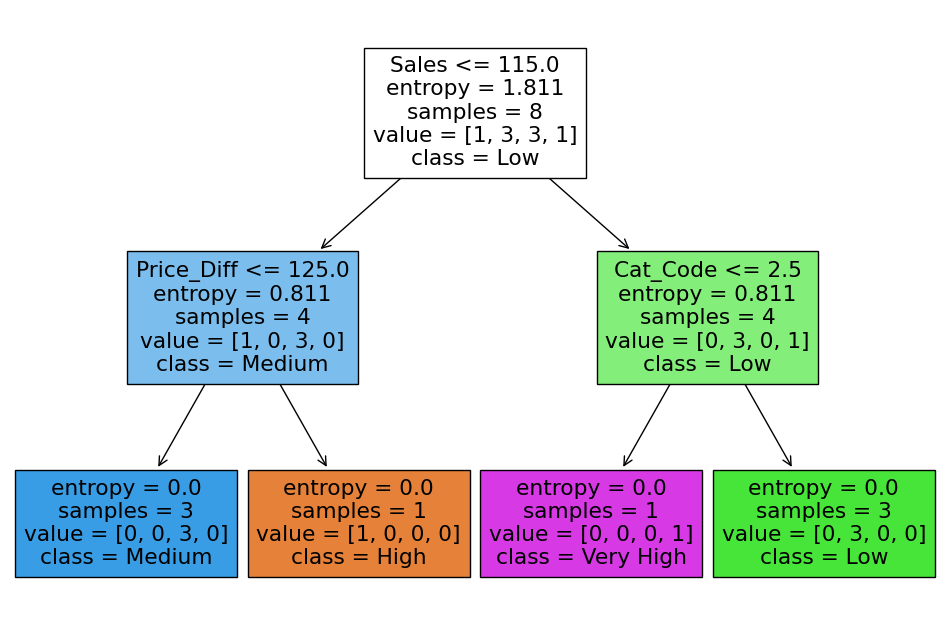

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=model.classes_.tolist(),
    filled=True
)
plt.show()


Accuracy: 1.0
F1 Score (macro): 1.0


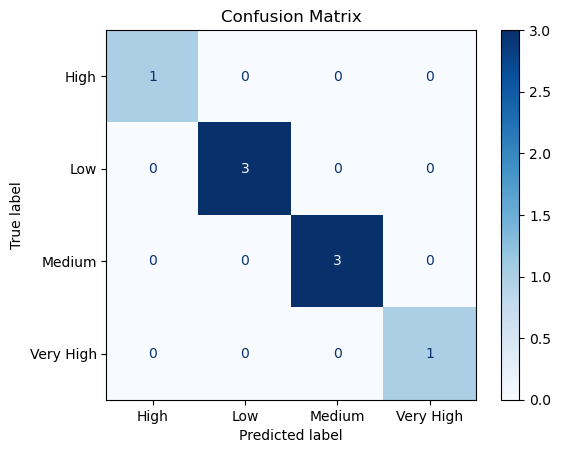

In [12]:
accuracy = accuracy_score(df['Price_Range'], df['Predicted_Range'])
f1 = f1_score(df['Price_Range'], df['Predicted_Range'], average='macro')
cm = confusion_matrix(df['Price_Range'], df['Predicted_Range'], labels=model.classes_)
print("Accuracy:", accuracy)
print("F1 Score (macro):", f1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
